**Loan Status Classification**
Here in this notebook we take a look at the data from a bank/financial organization of all their loans. We explore various features about the borrowers like credit score, mortgage, annual income, years of employment and try to train our classifer to predict if the loan would be paid or not.

In [1]:
import pycalib
from pycalib import metrics
from sklearn.calibration import calibration_curve

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier

# Any results you write to the current directory are saved as output.

['credit_test.csv', 'credit_train.csv']


In [3]:
dataframe = pd.read_csv('input/credit_train.csv')

**Before starting with any analysis, we take a small peek at our data and some of the values.**

In [4]:
print("Number of rows:", dataframe.shape[0])
print("Number of columns:", dataframe.shape[1])

Number of rows: 100514
Number of columns: 19


In [5]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00


In [6]:
len(dataframe)

100514

In [7]:
dataframe.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.00,80846.00,80846.00,100000.00,100000.00,46859.00,100000.00,100000.00,100000.00,99998.00,99796.00,99990.00
mean,11760447.39,1076.46,1378276.56,18472.41,18.20,34.90,11.13,0.17,294637.38,760798.38,0.12,0.03
std,31783942.55,1475.40,1081360.20,12174.99,7.02,22.00,5.01,0.48,376170.93,8384503.47,0.35,0.26
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,179652.00,705.00,848844.00,10214.16,13.50,16.00,8.00,0.00,112670.00,273438.00,0.00,0.00
50%,312246.00,724.00,1174162.00,16220.30,16.90,32.00,10.00,0.00,209817.00,467874.00,0.00,0.00
75%,524942.00,741.00,1650663.00,24012.06,21.70,51.00,14.00,0.00,367958.75,782958.00,0.00,0.00
max,99999999.00,7510.00,165557393.00,435843.28,70.50,176.00,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


Here, we see something strange. If you notice the average credit scoe is 1076+ which is strange considering the credit score are within th range of 300-850. Let's take a look and try to find sense of the credit score data and check if there are any score that are greater than 800.

In [8]:
df = dataframe[dataframe['Credit Score']>800]
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.00,Short Term,7290.00,896857.00,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.30,NaN,6.00,0.00,215308.00,272448.00,0.00,0.00
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948.00,Short Term,7120.00,537472.00,10+ years,Rent,Debt Consolidation,5777.90,14.80,NaN,4.00,0.00,132468.00,164406.00,0.00,0.00
51,0daecc08-0354-4753-b282-52124b2420df,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692.00,Long Term,6610.00,527839.00,10+ years,Rent,Debt Consolidation,14207.63,17.00,48.00,9.00,0.00,254277.00,379918.00,0.00,0.00
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012.00,Short Term,7380.00,728726.00,4 years,Rent,major_purchase,10135.36,11.40,NaN,8.00,0.00,104633.00,199936.00,0.00,0.00
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908.00,Long Term,7370.00,1028774.00,6 years,Home Mortgage,Debt Consolidation,22632.99,19.30,NaN,5.00,0.00,474658.00,742720.00,0.00,0.00


As we can see, it looks like some of the credit score are just scaled up by 10. For the ease of our calculation we can consider, scaling them back is accurate.

In [9]:
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: (val /10) if val>850 else val)

In [10]:
dataframe.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.00,80846.00,80846.00,100000.00,100000.00,46859.00,100000.00,100000.00,100000.00,99998.00,99796.00,99990.00
mean,11760447.39,716.29,1378276.56,18472.41,18.20,34.90,11.13,0.17,294637.38,760798.38,0.12,0.03
std,31783942.55,28.30,1081360.20,12174.99,7.02,22.00,5.01,0.48,376170.93,8384503.47,0.35,0.26
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,179652.00,703.00,848844.00,10214.16,13.50,16.00,8.00,0.00,112670.00,273438.00,0.00,0.00
50%,312246.00,722.00,1174162.00,16220.30,16.90,32.00,10.00,0.00,209817.00,467874.00,0.00,0.00
75%,524942.00,738.00,1650663.00,24012.06,21.70,51.00,14.00,0.00,367958.75,782958.00,0.00,0.00
max,99999999.00,751.00,165557393.00,435843.28,70.50,176.00,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


Now we can see our average credit score is within a normal credit score range so we can go further with our preprocessing.

In [11]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00


In [12]:
dataframe.dropna(subset=['Loan Status'], inplace = True)

In [13]:
le = preprocessing.LabelEncoder()
dataframe['Loan Status'] = le.fit_transform(dataframe['Loan Status'])

In [14]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00


# Loan Status is the categorical variable here denoting if the certain variable is paid off or not. In this notebook, we aim to predict that as our final output.

<AxesSubplot:title={'center':'Status of the Loan'}>

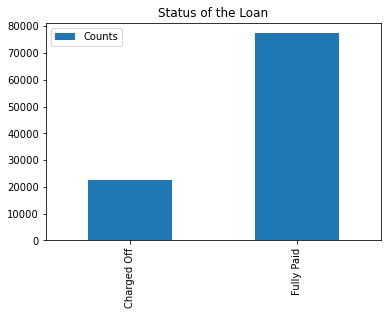

In [15]:
coffvalue = dataframe[dataframe['Loan Status'] == 0]['Loan Status'].count()
fpaidvalue = dataframe[dataframe['Loan Status'] == 1]['Loan Status'].count()
data = {"Counts":[coffvalue, fpaidvalue] }
statusDF = pd.DataFrame(data, index=["Charged Off", "Fully Paid"])
# statusDF.head()
statusDF.plot(kind='bar', title="Status of the Loan")

In [16]:
print("Value counts for each term: \n",dataframe['Term'].value_counts())
print("Missing data in loan term:",dataframe['Term'].isna().sum())

Value counts for each term: 
 Short Term    72208
Long Term     27792
Name: Term, dtype: int64
Missing data in loan term: 0


In [17]:
dataframe['Term'].replace(("Short Term","Long Term"),(0,1), inplace=True)
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00


In [18]:
scount = dataframe[dataframe['Term'] == 0]['Term'].count()
lcount = dataframe[dataframe['Term'] ==1]['Term'].count()

data = {"Counts":[scount, lcount]}
termDF = pd.DataFrame(data, index=["Short Term", "Long Term"])
termDF.head()

,Counts
Short Term,72208
Long Term,27792


<AxesSubplot:title={'center':'Term of Loans'}>

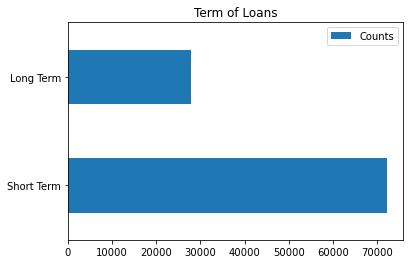

In [19]:
termDF.plot(kind="barh", title="Term of Loans")

Since credit score is one of the important part of our analysis, we first try to explore and handle our missing data before processing further with anything.

In [20]:
print("There are ", dataframe['Credit Score'].isna().sum(), "null values for Credit score.")

There are  19154 null values for Credit score.


***Since there are multiple ways to handle the missing data, one of which is to fill in the average of the column in the place of missing data. Here we follow the same concept but with a small tweak. We asume that the credit score of people having short term loan wouldn't be the same as credit score of people having long term loans. Hence we take separate average of credit score of people with short term loan and separate average of people with long term loan and then fill the missing credit score looking up at the term of the loan.***

In [21]:
cscoredf = dataframe[dataframe['Term']==0]
stermAVG = cscoredf['Credit Score'].mean()
print(stermAVG)

724.6209386906824


In [22]:
lscoredf = dataframe[dataframe['Term']==1]
ltermAVG = lscoredf['Credit Score'].mean()
print(ltermAVG)

695.483727170432


In [23]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00


# Preprocessing

In [24]:
do_nothing = lambda: None

In [25]:
dataframe.loc[(dataframe.Term ==0) & (dataframe['Credit Score'].isnull()),'Credit Score'] = stermAVG

In [26]:
dataframe.loc[(dataframe.Term ==1) & (dataframe['Credit Score'].isnull()),'Credit Score'] = ltermAVG

Since our problem is a classification problem, we can't have continuos variables in our dataframe. After the calculation of the missing variables we give our credit scores a range based on **Experian's Credit Score Range**.

In [27]:
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Poor" if np.isreal(val) and val < 580 else val)
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val)
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val)
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val)
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 850) else val)

<AxesSubplot:title={'center':'Number of loans in terms of Credit Score category'}>

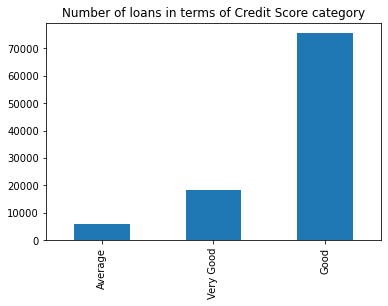

In [28]:
dataframe['Credit Score'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Number of loans in terms of Credit Score category')

Next up we look at our annual income column and fill up the missing values with the average of the column.

In [29]:
print("There are",dataframe['Annual Income'].isna().sum(), "Missing Annual Income Values.")

There are 19154 Missing Annual Income Values.


In [30]:
dataframe['Annual Income'].fillna(dataframe['Annual Income'].mean(), inplace=True)

In [31]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,Good,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,Good,1378276.56,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,Very Good,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,Good,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,Good,1378276.56,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00


Following up on our step with Credit Score, we now try to change it to a discrete value, but since it has multiple class, we use one hot encoding to make sure we dont increase the dimension of our data. We also look out for potential multi-colinearity as we drop one variable of the encoding, which is easily calculated given the other four variables. This is consistent through out the notebook, with the use of one hot encoding.

In [32]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Credit Score'], drop_first = True))

Since our values were only adjectives, we give it new names to make it more clear.

In [33]:
dataframe.rename(index = str, columns={'Good':'Credit Good', 'Very Good':'Credit Very Good'})

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Good,Credit Very Good
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,Good,1167493.00,8 years,Home Mortgage,Home Improvements,...,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00,1,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,Good,1378276.56,10+ years,Home Mortgage,Debt Consolidation,...,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00,1,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,Very Good,2231892.00,8 years,Own Home,Debt Consolidation,...,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00,0,1
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,Good,806949.00,3 years,Own Home,Debt Consolidation,...,12.00,NaN,9.00,0.00,256329.00,386958.00,0.00,0.00,1,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,Good,1378276.56,5 years,Rent,Debt Consolidation,...,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,1,147070.00,0,Good,475437.00,7 years,Own Home,other,...,22.30,NaN,5.00,0.00,47766.00,658548.00,0.00,0.00,1,0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,1,99999999.00,0,Good,1289416.00,1 year,Rent,Debt Consolidation,...,9.40,21.00,22.00,0.00,153045.00,509234.00,0.00,0.00,1,0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,1,103136.00,0,Very Good,1150545.00,6 years,Rent,Debt Consolidation,...,18.80,18.00,12.00,1.00,109554.00,537548.00,1.00,0.00,0,1
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,1,530332.00,0,Very Good,1717524.00,9 years,Rent,Debt Consolidation,...,15.00,NaN,8.00,0.00,404225.00,738254.00,0.00,0.00,0,1


In [34]:
dataframe = dataframe.drop(['Credit Score'], axis=1)

<AxesSubplot:title={'center':'Purpose for Loans'}>

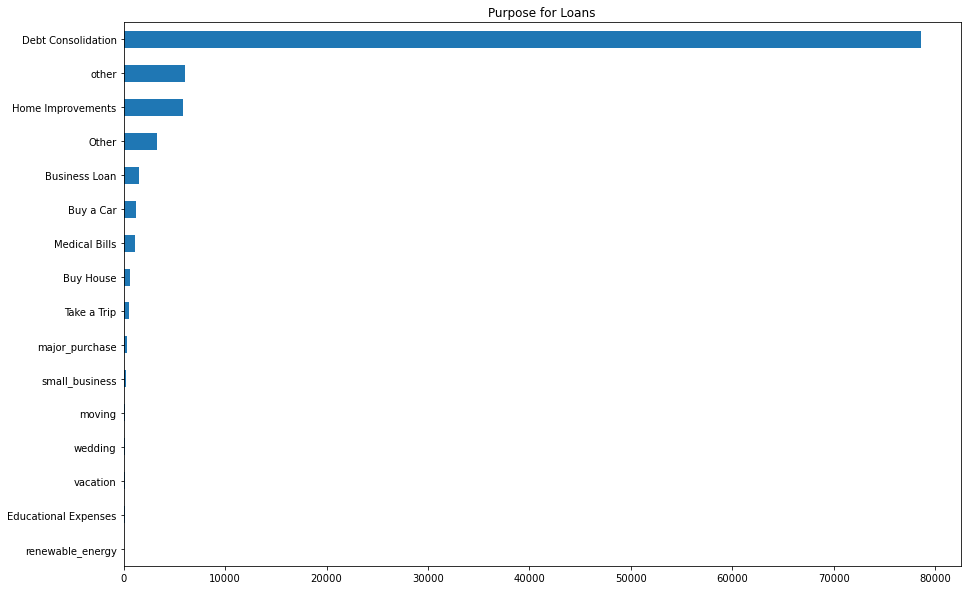

In [35]:
dataframe['Purpose'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Purpose for Loans", figsize=(15,10))

In [36]:
purposeloanstatus = dataframe[['Purpose','Loan Status']]
purposeloanstatus.head()

,Purpose,Loan Status
0,Home Improvements,1
1,Debt Consolidation,1
2,Debt Consolidation,1
3,Debt Consolidation,1
4,Debt Consolidation,1


<AxesSubplot:title={'center':'Purpose of Loan Vs Loan Payment Status'}, xlabel='Purpose'>

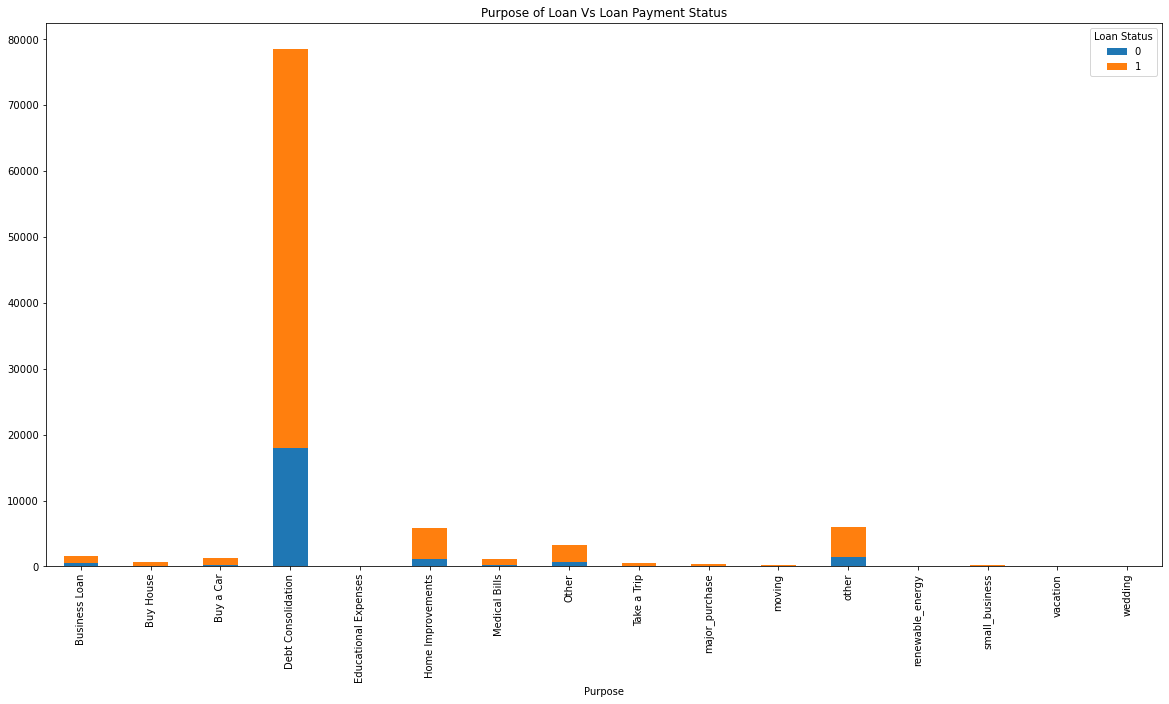

In [37]:
pd.crosstab(purposeloanstatus['Purpose'], purposeloanstatus['Loan Status']).plot(kind='bar', stacked=True, figsize=(20,10), title="Purpose of Loan Vs Loan Payment Status", )

Next up, we take a look at the Home ownership status of the people who have taken loan and try to visualize it.

<AxesSubplot:title={'center':'Number of Loan based on Home ownership'}>

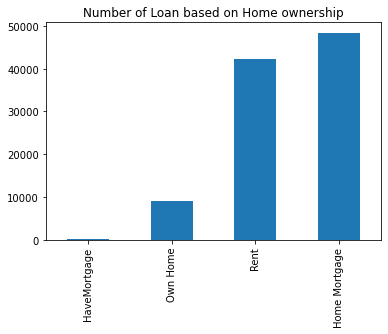

In [38]:
dataframe['Home Ownership'].value_counts().sort_values(ascending = True).plot(kind='bar', title="Number of Loan based on Home ownership")

As we can see most of the loans have been either by the people have mortgage on their home or by people who are in rent.

In [39]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Home Ownership'],drop_first = True))

In [40]:
dataframe = dataframe.drop(['Home Ownership'], axis=1)

Moving forward, age of employment is one of the major factor in deciding the person's financial stability and secure income sources.  Here our data was a String with non uniform spread. first we need to extract the given numbers from our data and then give it a unform range to convert it into a categorical variable

In [41]:
dataframe['Years in current job']=dataframe['Years in current job'].str.extract(r"(\d+)")
dataframe['Years in current job'] = dataframe['Years in current job'].astype(float)
# dataframe['Years in current job'].fillna(dataframe['Years in current job'].mean(), inplace = True)


In [42]:
expmean = dataframe['Years in current job'].mean()

In [43]:
dataframe['Years in current job'].fillna(expmean, inplace=True)

Now That we have a numerical value for our Employment Age, we use a uniform range to convert it into categories.

In [44]:
dataframe['Employment History'] = dataframe['Years in current job'].apply(lambda x: "Emp Level Jr." if x<4 else ("Emp Level Mid" if x>4 and x<8 else "Emp Senior"))

In [45]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Purpose,Monthly Debt,Years of Credit History,...,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Employment History
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,1167493.00,8.00,Home Improvements,5214.74,17.20,...,228190.00,416746.00,1.00,0.00,1,0,1,0,0,Emp Senior
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,1378276.56,10.00,Debt Consolidation,33295.98,21.10,...,229976.00,850784.00,0.00,0.00,1,0,1,0,0,Emp Senior
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,2231892.00,8.00,Debt Consolidation,29200.53,14.90,...,297996.00,750090.00,0.00,0.00,0,1,0,1,0,Emp Senior
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,806949.00,3.00,Debt Consolidation,8741.90,12.00,...,256329.00,386958.00,0.00,0.00,1,0,0,1,0,Emp Level Jr.
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,1378276.56,5.00,Debt Consolidation,20639.70,6.10,...,253460.00,427174.00,0.00,0.00,1,0,0,0,1,Emp Level Mid


In [46]:
dataframe = dataframe.drop(['Years in current job'], axis=1)

Now that we have the categories for our employment history, we use one hot encoding on the column.

In [47]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Employment History'],drop_first = True))

we then drop the Employment History column.

In [48]:
dataframe = dataframe.drop(['Employment History'], axis=1)

If we take a look at our data, there are columns like Loan ID, Customer ID which isn't important for our analysis. While we can argue   in some cases  purpose of loan could be one deciding factor but here we consider it to be unimportant and drop that as well.

In [49]:
dataframe = dataframe.drop(['Loan ID','Customer ID','Purpose'], axis=1)

In [50]:
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior
0,1,445412.00,0,1167493.00,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00,1,0,1,0,0,0,1
1,1,262328.00,0,1378276.56,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00,1,0,1,0,0,0,1
2,1,99999999.00,0,2231892.00,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00,0,1,0,1,0,0,1
3,1,347666.00,1,806949.00,8741.90,12.00,NaN,9.00,0.00,256329.00,386958.00,0.00,0.00,1,0,0,1,0,0,0
4,1,176220.00,0,1378276.56,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00,1,0,0,0,1,1,0


Next up is number of credit problems reported for each individual loanee. We split that into three categories with 0 being None, 1-5 as Some and more than 5 to be major credit problems.

In [51]:
dataframe['Credit Problems'] = dataframe['Number of Credit Problems'].apply(lambda x: "No Credit Problem" if x==0 else ("Some Credit promblem" if x>0 and x<5 else "Major Credit Problems"))

In [52]:
dataframe['Credit Problems'].value_counts()

No Credit Problem        86035
Some Credit promblem     13879
Major Credit Problems       86
Name: Credit Problems, dtype: int64

<AxesSubplot:title={'center':'Loans vs Credit problems of Loanee'}>

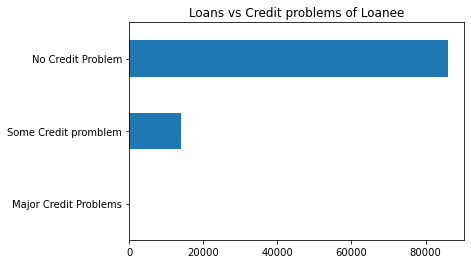

In [53]:
dataframe['Credit Problems'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Loans vs Credit problems of Loanee")

Looking at the graph above, we establish a common asumption that loans are generally not given to people having credit problems. Next up, we convert Credit Problems into discrete variables. 

In [54]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Credit Problems'],drop_first = True))

In [55]:
dataframe = dataframe.drop(['Credit Problems','Number of Credit Problems'], axis=1)

In [56]:
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,...,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem
0,1,445412.00,0,1167493.00,5214.74,17.20,NaN,6.00,228190.00,416746.00,...,0.00,1,0,1,0,0,0,1,0,1
1,1,262328.00,0,1378276.56,33295.98,21.10,8.00,35.00,229976.00,850784.00,...,0.00,1,0,1,0,0,0,1,1,0
2,1,99999999.00,0,2231892.00,29200.53,14.90,29.00,18.00,297996.00,750090.00,...,0.00,0,1,0,1,0,0,1,0,1
3,1,347666.00,1,806949.00,8741.90,12.00,NaN,9.00,256329.00,386958.00,...,0.00,1,0,0,1,0,0,0,1,0
4,1,176220.00,0,1378276.56,20639.70,6.10,NaN,15.00,253460.00,427174.00,...,0.00,1,0,0,0,1,1,0,1,0


Another important feature for financial stability identification is the years of credit history. We look at the given credit age of individuals and categorize them using one hot encoding.

In [57]:
dataframe['Credit Age'] = dataframe['Years of Credit History'].apply(lambda x: "Short Credit Age" if x<5 else ("Good Credit Age" if x>5 and x<17 else "Exceptional Credit Age"))

In [58]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Credit Age'],drop_first = True))

In [59]:
dataframe = dataframe.drop(['Credit Age','Years of Credit History'], axis =1)
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age
0,1,445412.00,0,1167493.00,5214.74,NaN,6.00,228190.00,416746.00,1.00,...,0,1,0,0,0,1,0,1,0,0
1,1,262328.00,0,1378276.56,33295.98,8.00,35.00,229976.00,850784.00,0.00,...,0,1,0,0,0,1,1,0,0,0
2,1,99999999.00,0,2231892.00,29200.53,29.00,18.00,297996.00,750090.00,0.00,...,1,0,1,0,0,1,0,1,1,0
3,1,347666.00,1,806949.00,8741.90,NaN,9.00,256329.00,386958.00,0.00,...,0,0,1,0,0,0,1,0,1,0
4,1,176220.00,0,1378276.56,20639.70,NaN,15.00,253460.00,427174.00,0.00,...,0,0,0,1,1,0,1,0,1,0


We move forward with the asumption that some of the columns are correlated with the others and hence we try to reduce the number of features. For example, we have credit score and credit problems which can is calculated using features like maximum open credit, current credit balance etc. So we drop some of the columns that we asume are already covered by features we have on our dataframe.

In [60]:
dataframe = dataframe.drop(['Months since last delinquent','Number of Open Accounts','Maximum Open Credit','Current Credit Balance','Monthly Debt'],axis=1)

In [61]:
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age
0,1,445412.00,0,1167493.00,1.00,0.00,1,0,1,0,0,0,1,0,1,0,0
1,1,262328.00,0,1378276.56,0.00,0.00,1,0,1,0,0,0,1,1,0,0,0
2,1,99999999.00,0,2231892.00,0.00,0.00,0,1,0,1,0,0,1,0,1,1,0
3,1,347666.00,1,806949.00,0.00,0.00,1,0,0,1,0,0,0,1,0,1,0
4,1,176220.00,0,1378276.56,0.00,0.00,1,0,0,0,1,1,0,1,0,1,0


Further exploring the financial stability of each loanee, we take the look at number of liens on their property by court which would give us information about their previous commitments.

In [62]:
dataframe['Tax Liens'] = dataframe['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0 else ("Some Tax Liens" if x>0 and x<3 else "Many Tax Liens"))

In [63]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Tax Liens'],drop_first = True))

In [64]:
dataframe = dataframe.drop(['Tax Liens'],axis=1)
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Bankruptcies,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens
0,1,445412.00,0,1167493.00,1.00,1,0,1,0,0,0,1,0,1,0,0,1,0
1,1,262328.00,0,1378276.56,0.00,1,0,1,0,0,0,1,1,0,0,0,1,0
2,1,99999999.00,0,2231892.00,0.00,0,1,0,1,0,0,1,0,1,1,0,1,0
3,1,347666.00,1,806949.00,0.00,1,0,0,1,0,0,0,1,0,1,0,1,0
4,1,176220.00,0,1378276.56,0.00,1,0,0,0,1,1,0,1,0,1,0,1,0


Furthermore, we take a look at nuber of bankruptcies filed by people and categorize them.

In [65]:
dataframe['Bankruptcies'] = dataframe['Bankruptcies'].apply(lambda x: "No bankruptcies" if x==0 else ("Some Bankruptcies" if x>0 and x<3 else "Many Bankruptcies"))

In [66]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Bankruptcies'],drop_first = True))

In [67]:
dataframe = dataframe.drop(['Bankruptcies'],axis=1)
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
0,1,445412.00,0,1167493.00,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
1,1,262328.00,0,1378276.56,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0
2,1,99999999.00,0,2231892.00,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
3,1,347666.00,1,806949.00,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0
4,1,176220.00,0,1378276.56,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0


In [68]:
dataframe.describe()

,Loan Status,Current Loan Amount,Term,Annual Income,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,0.77,11760447.39,0.28,1378276.56,0.76,0.18,0.48,0.09,0.42,0.22,0.46,0.86,0.14,0.50,0.00,0.98,0.02,0.89,0.11
std,0.42,31783942.55,0.45,972297.42,0.43,0.39,0.50,0.29,0.49,0.42,0.50,0.35,0.35,0.50,0.04,0.14,0.13,0.32,0.31
min,0.00,10802.00,0.00,76627.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,179652.00,0.00,931180.50,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
50%,1.00,312246.00,0.00,1369919.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
75%,1.00,524942.00,1.00,1512704.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
max,1.00,99999999.00,1.00,165557393.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


**We already know we're predicting categorical variables hence we have to convert our cateorical variables into discrete. Next up we try to convert annual income and total loan amount into discrete variables. 
There are some calculation we do before deciding a range from the categories. If we take a look, we have some data that are outliers and are way off the other loan amounts. so we try to calculate the average and standard deviation without the outlier. 
We asume : Mean - 1 standard deviation = low income line
                    Mean + 1 standard deviation = high income line
  and similar for the loan amount as well.
**

In [69]:
meanxoutlier = dataframe[dataframe['Annual Income'] < 99999999.00 ]['Annual Income'].mean()
stddevxoutlier = dataframe[dataframe['Annual Income'] < 99999999.00 ]['Annual Income'].std()
poorline = meanxoutlier -  stddevxoutlier
richline = meanxoutlier + stddevxoutlier

In [70]:
dataframe['Annual Income'] = dataframe['Annual Income'].apply(lambda x: "Low Income" if x<=poorline else ("Average Income" if x>poorline and x<richline else "High Income"))

In [71]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Annual Income'],drop_first = True))

In [72]:
dataframe = dataframe.drop(['Annual Income'], axis=1)
dataframe.head()

,Loan Status,Current Loan Amount,Term,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies,High Income,Low Income
0,1,445412.00,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,262328.00,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0
2,1,99999999.00,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,1,347666.00,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0
4,1,176220.00,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0


In [73]:
lmeanxoutlier = dataframe[dataframe['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
lstddevxoutlier = dataframe[dataframe['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()
lowrange = lmeanxoutlier - lstddevxoutlier
highrange = lmeanxoutlier + lstddevxoutlier
print(lowrange, highrange)

126051.43019084871 498575.7655703696


In [74]:
dataframe['Current Loan Amount'] = dataframe['Current Loan Amount'].apply(lambda x: "Small Loan" if x<=lowrange else ("Medium Loan" if x>lowrange and x<highrange else "Big Loan"))

In [75]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Current Loan Amount'],drop_first = True))

In [76]:
dataframe = dataframe.drop(['Current Loan Amount'], axis=1)

In [77]:
dataframe.head()

,Loan Status,Term,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,...,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies,High Income,Low Income,Medium Loan,Small Loan
0,1,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,1,0,1,0,1,0,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
2,1,0,0,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0
3,1,1,1,0,0,1,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,0,0,1,1,0,1,...,1,0,1,0,1,0,0,0,1,0


Now we can see that we have all categorical values for our dataframe we can divide it into training and test set and plug into some classification algorithm.

In [78]:
y = dataframe['Loan Status']
X = dataframe.drop(['Loan Status'],axis=1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# KNN

In [80]:
knnclassifier = KNeighborsClassifier(n_neighbors = int(X.shape[1]/2))
knnclassifier.fit(X_train, y_train)
prediction = knnclassifier.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, prediction))
# y_true = y_test


Accuracy Score:  0.7507575757575757


In [81]:
y_test

75721    1
80184    0
19864    0
76699    1
92991    1
        ..
97545    1
15490    1
62384    0
54594    1
64709    1
Name: Loan Status, Length: 33000, dtype: int64

In [82]:
pred = y_test.copy(deep=True)
for i in range(len(pred)):
    pred.values[i] = prediction[i]
pred

75721    0
80184    1
19864    0
76699    1
92991    1
        ..
97545    1
15490    1
62384    1
54594    1
64709    1
Name: Loan Status, Length: 33000, dtype: int64

In [83]:
prediction

array([0, 1, 0, ..., 1, 1, 1])

In [84]:
indexes = y_test.index.values
indexes = indexes.tolist()

In [85]:
# y_true = y_test.tolist()
# pred = pred.tolist()

In [86]:
y_true = [[] for i in range(len(indexes))]
pred = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    y_true[i] = (indexes[i], y_test.values[i])
    pred[i] = (indexes[i], prediction[i])
# y_true
# pred

In [87]:
scores_knn = knnclassifier.predict_proba(X_test)
scores_knn

array([[0.5, 0.5],
       [0.1, 0.9],
       [0.5, 0.5],
       ...,
       [0.2, 0.8],
       [0.4, 0.6],
       [0.2, 0.8]])

# binary_ECE

In [88]:
# Calculate the ECE value of knnclassifier
pycalib.metrics.binary_ECE(y_test.values, scores_knn[:,1], bins=15)

0.0841909090909092

In [89]:
# accuracy of knnclassifier
pycalib.metrics.accuracy(y_true, pred)

1.0

In [90]:
# brier score
pycalib.metrics.brier_score(y_test.values, prediction)

0.24924242424242424

In [91]:
# cross-entropy (log loss)
pycalib.metrics.cross_entropy(y_test.values, prediction)

8.608694675300038

In [92]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, prediction).ravel()
print(tneg,fpos,fneg,tpos)

670 6864 1361 24105


In [93]:
# y_test.values
# prediction

In [94]:
knn_true, knn_pred = calibration_curve(y_test.values, prediction, n_bins = 10)
knn_true

array([0.67011324, 0.778359  ])

In [95]:
knn_pred

array([0., 1.])

In [96]:
y_test.values

array([1, 0, 0, ..., 0, 1, 1])

In [97]:
scores_knn

array([[0.5, 0.5],
       [0.1, 0.9],
       [0.5, 0.5],
       ...,
       [0.2, 0.8],
       [0.4, 0.6],
       [0.2, 0.8]])

In [98]:
scores_knn[:,1]

array([0.5, 0.9, 0.5, ..., 0.8, 0.6, 0.8])

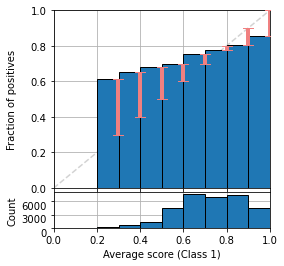

In [99]:
from pycalib.visualisations import plot_reliability_diagram

fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)


# Logistic Regression

In [100]:
lregclassifier = LogisticRegression(max_iter=1000)
lregclassifier.fit(X_train,y_train)
lregprediction = lregclassifier.predict(X_test)
print("Score: ",lregclassifier.score(X_test, y_test))

Score:  0.7717575757575758


In [101]:
lregpred = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    lregpred[i] = (indexes[i], lregprediction[i])
# lregpred

In [102]:
# Calculate the ECE value of lregclassifier
pycalib.metrics.ECE(y_true, lregpred, normalize=False, bins=15, ece_full=True)

0.24996969696969698

In [103]:
# accuracy of lregclassifier
pycalib.metrics.accuracy(y_true, lregpred)

1.0

In [104]:
# brier score
pycalib.metrics.brier_score(y_test.values, lregprediction)

0.22824242424242425

In [105]:
# cross-entropy (log loss)
pycalib.metrics.cross_entropy(y_test.values, lregprediction)

7.883396484106643

In [106]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, lregprediction).ravel()
print(tneg,fpos,fneg,tpos)

5 7529 3 25463


In [107]:
lreg_true, lreg_pred = calibration_curve(y_test.values, lregprediction, n_bins = 10)
lreg_true

array([0.375     , 0.77179316])

In [108]:
lreg_pred

array([0., 1.])

In [109]:
scores_lreg = lregclassifier.predict_proba(X_test)

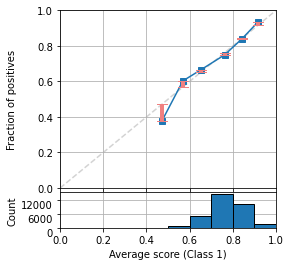

In [110]:
fig2 = pycalib.visualisations.plot_reliability_diagram(y_test,
                                                [scores_lreg, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=False,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

# SVC

In [111]:
from sklearn.svm import SVC
# modify probability=True
svc = SVC(gamma='auto', kernel ='linear', probability=True)
# svc = SVC(gamma='auto', kernel ='linear')
svc.fit(X_train, y_train)
svcprediction = svc.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, svcprediction))

Accuracy Score:  0.7716969696969697


In [112]:
svcpred = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    svcpred[i] = (indexes[i], svcprediction[i])
# svcpred

In [113]:
# Calculate the ECE value of svc classifier
pycalib.metrics.ECE(y_true, svcpred, normalize=False, bins=15, ece_full=True)

0.25

In [114]:
# accuracy of svc classifier
pycalib.metrics.accuracy(y_true, svcpred)

1.0

In [115]:
# brier score
pycalib.metrics.brier_score(y_test.values, svcprediction)

0.2283030303030303

In [116]:
# cross-entropy (log loss)
pycalib.metrics.cross_entropy(y_test.values, svcprediction)

7.885489864433218

In [117]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, svcprediction).ravel()
print(tneg,fpos,fneg,tpos)

0 7534 0 25466


In [118]:
svc_true, svc_pred = calibration_curve(y_test.values, svcprediction)
svc_true

array([0.77169697])

In [119]:
svc_pred

array([1.])

In [120]:
scores_svc = svc.predict_proba(X_test)

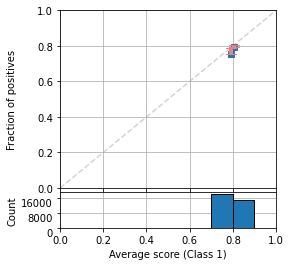

In [121]:
fig3 = pycalib.visualisations.plot_reliability_diagram(y_test,
                                                [scores_svc, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=False,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

# XGB

In [122]:
XGBclf = XGBClassifier()
XGBclf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [123]:
XGBpred = XGBclf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, XGBpred))

Accuracy Score:  0.7701212121212121


In [124]:
XGB = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    XGB[i] = (indexes[i], XGBpred[i])

In [125]:
# Calculate the ECE value of XGB classifier
pycalib.metrics.ECE(y_true, XGB, normalize=False, bins=15, ece_full=True)

0.24831818181818183

In [126]:
# brier score
pycalib.metrics.brier_score(y_test.values, XGBpred)

0.22987878787878788

In [127]:
# cross-entropy (log loss)
pycalib.metrics.cross_entropy(y_test.values, XGBpred)

7.939912640346658

In [128]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, XGBpred).ravel()
print(tneg,fpos,fneg,tpos)

81 7453 133 25333


In [129]:
xgb_true, xgb_pred = calibration_curve(y_test.values, XGBpred)
xgb_true

array([0.62149533, 0.77267736])

In [130]:
xgb_pred

array([0., 1.])

In [131]:
scores_xgb = XGBclf.predict_proba(X_test)

In [132]:
scores_xgb

array([[0.30756724, 0.69243276],
       [0.1933369 , 0.8066631 ],
       [0.40488076, 0.59511924],
       ...,
       [0.29498088, 0.7050191 ],
       [0.2476492 , 0.7523508 ],
       [0.19527346, 0.80472654]], dtype=float32)

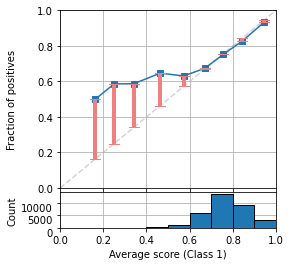

In [133]:
fig4 = pycalib.visualisations.plot_reliability_diagram(y_test,
                                                [scores_xgb, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=False,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

# SGD

In [134]:
# SGDclf = SGDClassifier(loss='modified_huber',shuffle=True)
SGDclf = SGDClassifier(loss='modified_huber')
SGDclf.fit(X_train,y_train) 

SGDClassifier(loss='modified_huber')

In [135]:
# SGDClassifier.predict_proba(X_test)

In [136]:
SGDpred = SGDclf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, SGDpred))

Accuracy Score:  0.7716969696969697


In [137]:
SGD = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    SGD[i] = (indexes[i], SGDpred[i])

In [138]:
# Calculate the ECE value of SGD classifier
pycalib.metrics.ECE(y_true, SGD, normalize=False, bins=15, ece_full=True)

0.25

In [139]:
# brier score
pycalib.metrics.brier_score(y_test.values, SGDpred)

0.2283030303030303

In [140]:
# cross-entropy (log loss)
pycalib.metrics.cross_entropy(y_test.values, SGDpred)

7.885489864433218

In [141]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, SGDpred).ravel()
print(tneg,fpos,fneg,tpos)

0 7534 0 25466


In [142]:
sgd_true, sgd_pred = calibration_curve(y_test.values, SGDpred)
sgd_true

array([0.77169697])

In [143]:
sgd_pred

array([1.])

In [144]:
# pycalib.visualisations.plot_reliability_diagram(y_test,
#                                                 [scores_sgd, ],
#                                                 legend=None,
#                                                 show_histogram=True,
#                                                 bins=10,
#                                                 class_names=None,
#                                                 fig=None,
#                                                 show_counts=False,
#                                                 errorbar_interval=None,
#                                                 interval_method='beta',
#                                                 fmt='s-',
#                                                 show_correction=False,
#                                                 show_gaps=True,
#                                                 sample_proportion=0,
#                                                 hist_per_class=False,
#                                                 color_list=None,
#                                                 show_bars=False,
#                                                 invert_histogram=False,
#                                                 color_gaps='lightcoral',
#                                                 confidence=False)

# Plots

In [145]:
acc = []
ece = []
brier = []
log = []
acc = [accuracy_score(y_test, prediction),
       lregclassifier.score(X_test, y_test),
       accuracy_score(y_test, svcprediction),
       accuracy_score(y_test, XGBpred),
       accuracy_score(y_test, SGDpred)]
ece = [pycalib.metrics.ECE(y_true, pred, normalize=False, bins=15, ece_full=True),
       pycalib.metrics.ECE(y_true, lregpred, normalize=False, bins=15, ece_full=True),
       pycalib.metrics.ECE(y_true, svcpred, normalize=False, bins=15, ece_full=True),
       pycalib.metrics.ECE(y_true, XGB, normalize=False, bins=15, ece_full=True),
       pycalib.metrics.ECE(y_true, SGD, normalize=False, bins=15, ece_full=True)]
brier = [pycalib.metrics.brier_score(y_test.values, prediction),
         pycalib.metrics.brier_score(y_test.values, lregprediction),
         pycalib.metrics.brier_score(y_test.values, svcprediction),
         pycalib.metrics.brier_score(y_test.values, XGBpred),
         pycalib.metrics.brier_score(y_test.values, SGDpred)]
log = [pycalib.metrics.cross_entropy(y_test.values, prediction),
       pycalib.metrics.cross_entropy(y_test.values, lregprediction),
       pycalib.metrics.cross_entropy(y_test.values, svcprediction),
       pycalib.metrics.cross_entropy(y_test.values, XGBpred),
       pycalib.metrics.cross_entropy(y_test.values, SGDpred)]

In [146]:
acc

[0.7507575757575757,
 0.7717575757575758,
 0.7716969696969697,
 0.7701212121212121,
 0.7716969696969697]

In [147]:
ece

[0.23454545454545456, 0.24996969696969698, 0.25, 0.24831818181818183, 0.25]

In [148]:
brier

[0.24924242424242424,
 0.22824242424242425,
 0.2283030303030303,
 0.22987878787878788,
 0.2283030303030303]

In [149]:
log

[8.608694675300038,
 7.883396484106643,
 7.885489864433218,
 7.939912640346658,
 7.885489864433218]

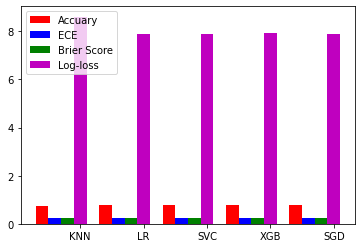

In [150]:
#------------------------------
# bar plot

estimates = ["Accuarcy", "ECE", "Brier score", "Log-loss"]
model = ["KNN", "LR", "SVC", "XGB", "SGD"]
total_width = 1
n = 5
width = total_width / n
q = list(range(len(acc)))
plt.bar(q, acc, fc = "r", label = 'Accuary', width = width)
for i in range(len(q)):
    q[i] = q[i] + width
plt.bar(q, ece, fc = "b", label = 'ECE', width = width)
for i in range(len(q)):
    q[i] = q[i] + width
plt.bar(q, brier, fc = "g", label = 'Brier Score', width = width)
for i in range(len(q)):
    q[i] = q[i] + width
plt.bar(q, log, fc = "m", label = 'Log-loss', tick_label = model, width = width)
scale = range(5)
# plt.xticks(scale, model)
plt.legend()
plt.show()

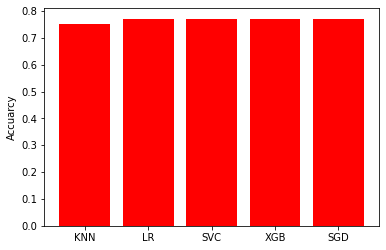

In [151]:
plt.bar(np.arange(5), acc, fc = "r")
plt.ylabel('Accuarcy')
plt.xticks(scale, model)
plt.show()

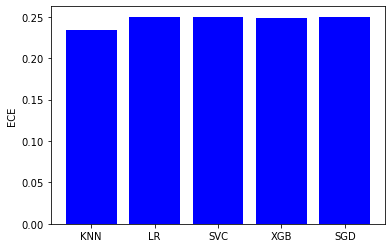

In [152]:
plt.bar(np.arange(5), ece, fc = "b")
plt.ylabel('ECE')
plt.xticks(scale, model)
plt.show()

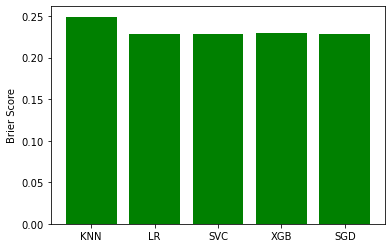

In [153]:
plt.bar(np.arange(5), brier, fc = "g")
plt.ylabel('Brier Score')
plt.xticks(scale, model)
plt.show()

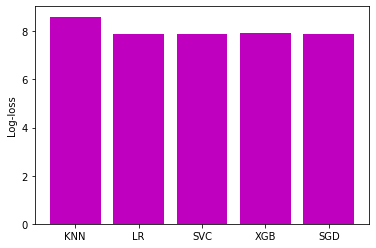

In [154]:
plt.bar(np.arange(5), log, fc = "m")
plt.ylabel('Log-loss')
plt.xticks(scale, model)
plt.show()

In [155]:
# import matplotlib.lines as mlines
# import matplotlib.transforms as mtransforms

# fig, ax = plt.subplots()
# plt.plot(knn_pred, knn_true, marker='o', linewidth=1, label='KNN')
# plt.plot(lreg_pred, lreg_true, marker='o', linewidth=1, label='LR')
# plt.plot(svc_pred, svc_true, marker='o', linewidth=1, label='SVC')
# plt.plot(xgb_pred, xgb_true, marker='o', linewidth=1, label='XGB')
# plt.plot(sgd_pred, sgd_true, marker='o', linewidth=1, label='SGD')

# # reference line, legends, and axis labels
# line = mlines.Line2D([0, 1], [0, 1], color = 'black', linestyle = '--')
# transform = ax.transAxes
# line.set_transform(transform)
# ax.add_line(line)
# fig.suptitle('Reliability diagram')
# ax.set_xlabel('Predicted probability')
# ax.set_ylabel('True probability in each bin')
# plt.legend()
# plt.show()

In [156]:
classifiers = {"KNN": knnclassifier,
               "Logistic regression": lregclassifier,
               "SVC": svc,
               "XGB": XGBclf}
#                "SGD": SGDclf}

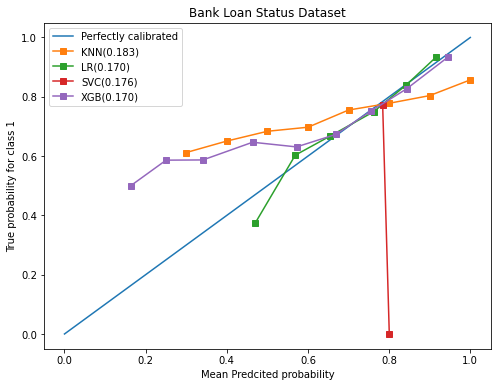

In [157]:
from sklearn.datasets import make_classification as mc
from sklearn.metrics import brier_score_loss # 导入布里尔分数
from sklearn.calibration import calibration_curve # 对概率类模型进行校准，方法是分箱

model2 = ["KNN", "LR", "SVC", "XGB"]
#开始画图
fig,ax1 = plt.subplots(figsize = (8,6))
ax1.plot([0,1],[0,1],label = "Perfectly calibrated") # 绘制对角线，把（0，0），（1，1）连起来
for clf,name_ in zip([knnclassifier, lregclassifier, svc, XGBclf],model):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    if hasattr(clf,"predict_proba"): #对象里如果有这个接口
        prob_pos = clf.predict_proba(X_test)[:,1]
    else: #就是针对SVM
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos-prob_pos.min())/(prob_pos.max()-prob_pos.min())  #手动归一化
    clf_score = brier_score_loss(y_test,prob_pos,pos_label=y.max())
    #对只有0，1的标签值进行分箱后才能画图
    trueproba, predproba = calibration_curve(y_test, prob_pos, n_bins=10)
    ax1.plot(predproba,trueproba,"s-",label = "%s(%1.3f)"%(name_,clf_score))
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean Predcited probability")
    ax1.set_ylim([-0.05,1.05])
    ax1.legend()
plt.title('Bank Loan Status Dataset')
plt.savefig('rd1.png')
plt.show()

# Hypothesis test

In [158]:
from scipy.stats import percentileofscore
from sklearn.preprocessing import label_binarize
import numpy as np

def label_resampling(probs):
    return np.random.binomial(1, probs)

def score_sampling(probs, samples = 10000, ece_function = None):
    probs = np.array(probs)
    return np.array(
        [
            ece_function(label_resampling(probs), probs) for sample in range(samples)
        ]
    )

def pECE(y_true, probs, samples = 10000, ece_function = pycalib.metrics.binary_ECE):
    probs = np.array(probs)
    return 1 - (
        percentileofscore(
            score_sampling(
                probs,
                samples=samples,
                ece_function=ece_function
            ),
            ece_function(y_true, probs)
        ) / 100
    )

In [159]:
pECE(y_test, scores_knn[:,1])

0.0

In [160]:
pECE(y_test.values, scores_lreg[:,1])

0.0

In [161]:
pECE(y_test.values, scores_svc[:,1])

0.0

In [162]:
pECE(y_test.values, scores_xgb[:,1])

0.0

# Calibration

In [163]:
from __future__ import division
import numpy as np

from scipy.special import expit

from sklearn.base import clone
from sklearn.utils import check_X_y, indexable
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import _SigmoidCalibration
from sklearn.metrics import log_loss

import warnings

from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import check_array
from sklearn.utils.validation import check_is_fitted
from inspect import signature
from sklearn.isotonic import IsotonicRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import check_cv


from betacal import BetaCalibration


class _DummyCalibration(BaseEstimator, RegressorMixin):
    """Dummy Calibration model. The purpose of this class is to give
    the CalibratedClassifierCV class the option to just return the
    probabilities of the base classifier.
    """
    def fit(self, *args, **kwargs):
        """Does nothing"""
        return self

    def predict_proba(self, T):
        """Return the probabilities of the base classifier"""
        return T

    def predict(self, scores, *args, **kwargs):
        proba = self.predict_proba(scores, *args, **kwargs)
        return proba.argmax(axis=1)


class IsotonicCalibration(IsotonicRegression):
    def __init__(self):
        super(IsotonicCalibration, self).__init__(y_min=0.0, y_max=1.0,
                                                  increasing=True,
                                                  out_of_bounds='clip')

    def fit(self, scores, y, *args, **kwargs):
        '''
        Score=0 corresponds to y=0, and score=1 to y=1
        Parameters
        ----------
        scores : array-like, shape = [n_samples,]
            Data.
        y : array-like, shape = [n_samples, ]
            Labels.
        Returns
        -------
        self
        '''
        if len(scores.shape) > 1:
            scores = scores[:, 1]
        return super(IsotonicCalibration, self).fit(scores, y, *args, **kwargs)

    def predict_proba(self, scores, *args, **kwargs):
        if len(scores.shape) > 1:
            scores = scores[:, 1]
        transformed = self.transform(scores, *args, **kwargs)
        if len(transformed.shape) == 1:
            transformed = np.vstack((1 - transformed, transformed)).T
        return transformed

    def predict(self, scores, *args, **kwargs):
        proba = self.predict_proba(scores, *args, **kwargs)
        return proba.argmax(axis=1)


def logit(x):
    eps = np.finfo(x.dtype).eps
    x = np.clip(x, eps, 1-eps)
    return np.log(x/(1 - x))


def log_encode(x):
    eps = np.finfo(x.dtype).eps
    x = np.clip(x, eps, 1)
    return np.log(x)


class LogisticCalibration(LogisticRegression):
    def __init__(self, C=1.0, solver='lbfgs', multi_class='multinomial',
                 log_transform=True):
        self.C_grid = C
        self.C = C if isinstance(C, float) else C[0]
        self.solver = solver
        self.log_transform = log_transform
        self.encode = log_encode if log_transform else logit
        self.multiclass = multi_class
        super(LogisticCalibration, self).__init__(C=C, solver=solver,
                                                  multi_class=multi_class)

    def fit(self, scores, y, X_val=None, y_val=None, *args, **kwargs):
        if isinstance(self.C_grid, list):
            calibrators = []
            losses = np.zeros(len(self.C_grid))
            for i, C in enumerate(self.C_grid):
                cal = LogisticCalibration(C=C, solver=self.solver,
                                          multi_class=self.multi_class,
                                          log_transform=self.log_transform)
                cal.fit(scores, y)
                losses[i] = log_loss(y_val, cal.predict_proba(X_val))
                calibrators.append(cal)
            best_idx = losses.argmin()
            self.C = calibrators[best_idx].C
        return super(LogisticCalibration, self).fit(self.encode(scores), y,
                                                    *args, **kwargs)

    def predict_proba(self, scores, *args, **kwargs):
        return super(LogisticCalibration,
                     self).predict_proba(self.encode(scores), *args, **kwargs)

    def predict(self, scores, *args, **kwargs):
        return super(LogisticCalibration, self).predict(self.encode(scores),
                                                        *args, **kwargs)


class SigmoidCalibration(_SigmoidCalibration):
    def fit(self, scores, y, *args, **kwargs):
        if len(scores.shape) > 1:
            scores = scores[:, 1]
        return super(SigmoidCalibration, self).fit(scores, y, *args, **kwargs)

    def predict_proba(self, scores, *args, **kwargs):
        if len(scores.shape) > 1:
            scores = scores[:, 1]
        transformed = super(SigmoidCalibration, self).predict(scores, *args, **kwargs)
        return np.vstack((1 - transformed, transformed)).T

    def predict(self, *args, **kwargs):
        proba = self.predict_proba(*args, **kwargs)
        return proba.argmax(axis=1)


class BinningCalibration(BaseEstimator, RegressorMixin):
    def __init__(self, n_bins=10, strategy='uniform', alpha=1.0):
        '''
        alpha : Laplace smoothing (x + a)/(N + 2a)
        n_bins: Number of bins
        stragegy:
                - uniform: for equal width bins
                - quantile: for equal frequency bins
                - kmeans: for each bin with same nearest center to a 1D k-means
        '''
        self.strategy = strategy
        self.n_bins = n_bins
        self.n_bins_grid = n_bins
        self.alpha = alpha

    def fit(self, scores, y, X_val=None, y_val=None, *args, **kwargs):
        '''
        Score=0 corresponds to y=0, and score=1 to y=1
        Parameters
        ----------
        scores : array-like, shape = [n_samples,]
            Data.
        y : array-like, shape = [n_samples, ]
            Labels.
        Returns
        -------
        self
        '''
        if isinstance(self.n_bins, list):
            if X_val is None or y_val is None:
                raise ValueError(('If n_bins is a list, scores_val and y_val'
                                  'are required during fit'))
            calibrators = []
            losses = []
            for n_bins in self.n_bins:
                cal = BinningCalibration(n_bins=n_bins, strategy=self.strategy,
                                         alpha=self.alpha)
                cal.fit(scores, y)
                predict = cal.predict_proba(X_val)
                losses.append(log_loss(y_val, predict))
                calibrators.append(cal)
            best_idx = np.argmin(losses)
            self.n_bins = calibrators[best_idx].n_bins
            self.bins = calibrators[best_idx].bins
            self.predictions = calibrators[best_idx].predictions
            return self

        if len(np.shape(scores)) > 1:
            scores = scores[:, 1]
        # TODO check that this code is correct:
        if self.strategy == 'quantile':
            self.bins = np.sort(scores)[::int(np.ceil(len(scores)
                                                      / self.n_bins))]
            self.bins = np.hstack([self.bins, scores[-1]])
        elif self.strategy == 'uniform':
            self.bins = np.linspace(scores.min(), scores.max(), self.n_bins+1)
        else:
            raise ValueError('Strategy {} not implemented'.format(
                                 self.strategy))
        self.bins[0] = - np.inf
        self.bins[-1] = np.inf
        s_binned = np.digitize(scores, self.bins) - 1
        self.predictions = np.zeros(self.n_bins)
        for i in range(self.n_bins):
            self.predictions[i] = ((np.sum(y[s_binned == i]) + self.alpha)
                                   / (np.sum(s_binned == i) + self.alpha*2))

        return self

    def predict_proba(self, scores, *args, **kwargs):
        if len(np.shape(scores)) > 1:
            scores = scores[:, 1]
        s_binned = np.digitize(scores, self.bins) - 1
        transformed = self.predictions[s_binned]
        return np.vstack((1 - transformed, transformed)).T

    def predict(self, scores, *args, **kwargs):
        proba = self.predict_proba(scores, *args, **kwargs)
        return proba.argmax(axis=1)


class CalibratedModel(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=None, calibrator=None,
                 fit_estimator=True):
        ''' Initialize a Calibrated model (classifier + calibrator)
        Parameters
        ----------
        base_estimator : estimator
            Classifier instance
        calibrator : estimator
            Calibrator instance
        '''
        self.calibrator = clone(calibrator)
        self.base_estimator = clone(base_estimator)
        self.fit_estimator = fit_estimator
        self.binary = False

    def fit(self, X, y, X_val=None, y_val=None, *args, **kwargs):
        """Fit the calibrated model
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.
        y : array-like, shape (n_samples, n_classes)
            Target values.
        Returns
        -------
        self : object
            Returns an instance of self.
        """

        X, y = check_X_y(X, y, accept_sparse=['csc', 'csr', 'coo'],
                         multi_output=True)
        X, y = indexable(X, y)

        if self.fit_estimator:
            self.base_estimator.fit(X, y)

        scores = self.base_estimator.predict_proba(X)

        if scores.shape[1] == 2:
            self.binary = True

        if self.binary:
            try:
                self.calibrator.fit(scores, y, *args, **kwargs)
            except ValueError:
                self.calibrator.fit(scores[:, 1], y, *args, **kwargs)
        else:
            self.calibrator.fit(scores, y, *args, **kwargs)

        return self

    def predict_proba(self, X):
        """Posterior probabilities of classification
        This function returns posterior probabilities of classification
        according to each class on an array of test vectors X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples, n_classes)
            The predicted probas. Can be exact zeros.
        """

        scores = self.base_estimator.predict_proba(X)

        if self.binary:
            try:
                predictions = self.calibrator.predict_proba(scores)
            except ValueError:
                predictions = self.calibrator.predict_proba(scores[:, 1])

            if (len(predictions.shape) == 1) or (predictions.shape[1] == 1):
                predictions = np.vstack((1 - predictions, predictions)).T
        else:
            predictions = self.calibrator.predict_proba(scores)

        return predictions

    def predict(self, X):
        """Predict the target of new samples. Can be different from the
        prediction of the uncalibrated classifier.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples,)
            The predicted class.
        """
        check_is_fitted(self, ["calibrator"])

        return np.argmax(self.predict_proba(X), axis=1)


class CalibratedClassifierCV(BaseEstimator, ClassifierMixin):
    """Probability calibration with isotonic regression, sigmoid or beta.
    With this class, the base_estimator is fit on the train set of the
    cross-validation generator and the test set is used for calibration.
    The probabilities for each of the folds are then averaged
    for prediction. In case cv="prefit" is passed to __init__,
    it is assumed that base_estimator has been
    fitted already and all data is used for calibration. Note that
    data for fitting the classifier and for calibrating it must be disjoint.
    Read more in the :ref:`User Guide <calibration>`.
    Parameters
    ----------
    base_estimator : instance BaseEstimator
        The classifier whose output decision function needs to be calibrated
        to offer more accurate predict_proba outputs. If cv=prefit, the
        classifier must have been fit already on data.
    method : None, 'sigmoid', 'isotonic', 'beta', 'beta_am' or 'beta_ab'
        The method to use for calibration. Can be 'sigmoid' which
        corresponds to Platt's method, 'isotonic' which is a
        non-parameteric approach or 'beta', 'beta_am' or 'beta_ab' which
        correspond to three different beta calibration methods. It is
        not advised to use  isotonic  calibration with too few calibration
        samples ``(<<1000)`` since it tends to overfit.
        Use beta models in this case.
    cv : integer, cross-validation generator, iterable or "prefit", optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
        - None, to use the default 3-fold cross-validation,
        - integer, to specify the number of folds.
        - An object to be used as a cross-validation generator.
        - An iterable yielding train/test splits.
        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If ``y`` is neither binary nor
        multiclass, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validation strategies that can be used here.
        If "prefit" is passed, it is assumed that base_estimator has been
        fitted already and all data is used for calibration.
    Attributes
    ----------
    classes_ : array, shape (n_classes)
        The class labels.
    calibrated_classifiers_: list (len() equal to cv or 1 if cv == "prefit")
        The list of calibrated classifiers, one for each cross-validation fold,
        which has been fitted on all but the validation fold and calibrated
        on the validation fold.
    References
    ----------
    .. [1] Obtaining calibrated probability estimates from decision trees
           and naive Bayesian classifiers, B. Zadrozny & C. Elkan, ICML 2001
    .. [2] Transforming Classifier Scores into Accurate Multiclass
           Probability Estimates, B. Zadrozny & C. Elkan, (KDD 2002)
    .. [3] Probabilistic Outputs for Support Vector Machines and Comparisons to
           Regularized Likelihood Methods, J. Platt, (1999)
    .. [4] Predicting Good Probabilities with Supervised Learning,
           A. Niculescu-Mizil & R. Caruana, ICML 2005
    """
    def __init__(self, base_estimator=None, method=None, cv=3,
                 score_type=None):
        self.base_estimator = base_estimator
        self.method = method
        self.cv = cv
        self.score_type = score_type

    def fit(self, X, y, sample_weight=None):
        """Fit the calibrated model
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.
        y : array-like, shape (n_samples,)
            Target values.
        sample_weight : array-like, shape = [n_samples] or None
            Sample weights. If None, then samples are equally weighted.
        Returns
        -------
        self : object
            Returns an instance of self.
        """
        X, y = check_X_y(X, y, accept_sparse=['csc', 'csr', 'coo'],
                         force_all_finite=False)
        X, y = indexable(X, y)
        lb = LabelBinarizer().fit(y)
        self.classes_ = lb.classes_

        # Check that each cross-validation fold can have at least one
        # example per class
        n_folds = self.cv if isinstance(self.cv, int) \
            else self.cv.n_folds if hasattr(self.cv, "n_folds") else None
        if n_folds and \
           np.any([np.sum(y == class_) < n_folds for class_ in self.classes_]):
            raise ValueError("Requesting %d-fold cross-validation but provided"
                             " less than %d examples for at least one class."
                             % (n_folds, n_folds))

        self.calibrated_classifiers_ = []
        if self.base_estimator is None:
            # we want all classifiers that don't expose a random_state
            # to be deterministic (and we don't want to expose this one).
            base_estimator = LinearSVC(random_state=0)
        else:
            base_estimator = self.base_estimator

        if self.cv == "prefit":
            calibrated_classifier = _CalibratedClassifier(
                base_estimator, method=self.method, score_type=self.score_type)
            if sample_weight is not None:
                calibrated_classifier.fit(X, y, sample_weight)
            else:
                calibrated_classifier.fit(X, y)
            self.calibrated_classifiers_.append(calibrated_classifier)
        else:
            cv = check_cv(self.cv, y, classifier=True)
            fit_parameters = signature(base_estimator.fit).parameters
            estimator_name = type(base_estimator).__name__
            if (sample_weight is not None
                    and "sample_weight" not in fit_parameters):
                warnings.warn("%s does not support sample_weight. Samples"
                              " weights are only used for the calibration"
                              " itself." % estimator_name)
                base_estimator_sample_weight = None
            else:
                base_estimator_sample_weight = sample_weight
            for train, test in cv.split(X, y):
                this_estimator = clone(base_estimator)
                if base_estimator_sample_weight is not None:
                    this_estimator.fit(
                        X[train], y[train],
                        sample_weight=base_estimator_sample_weight[train])
                else:
                    this_estimator.fit(X[train], y[train])

                calibrated_classifier = _CalibratedClassifier(
                    this_estimator, method=self.method,
                    score_type=self.score_type)
                if sample_weight is not None:
                    calibrated_classifier.fit(X[test], y[test],
                                              sample_weight[test])
                else:
                    calibrated_classifier.fit(X[test], y[test])
                self.calibrated_classifiers_.append(calibrated_classifier)

        return self

    def predict_proba(self, X):
        """Posterior probabilities of classification
        This function returns posterior probabilities of classification
        according to each class on an array of test vectors X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples, n_classes)
            The predicted probas.
        """
        check_is_fitted(self, ["classes_", "calibrated_classifiers_"])
        X = check_array(X, accept_sparse=['csc', 'csr', 'coo'],
                        force_all_finite=False)
        # Compute the arithmetic mean of the predictions of the calibrated
        # classfiers
        mean_proba = np.zeros((X.shape[0], len(self.classes_)))
        for calibrated_classifier in self.calibrated_classifiers_:
            proba = calibrated_classifier.predict_proba(X)
            mean_proba += proba

        mean_proba /= len(self.calibrated_classifiers_)

        return mean_proba

    def calibrate_scores(self, df):
        """Posterior probabilities of classification
        This function returns posterior probabilities of classification
        according to each class on an array of test vectors X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples, n_classes)
            The predicted probas.
        """
        check_is_fitted(self, ["classes_", "calibrated_classifiers_"])
        # Compute the arithmetic mean of the predictions of the calibrated
        # classifiers
        df = df.reshape(-1, 1)
        mean_proba = np.zeros((len(df), len(self.classes_)))
        for calibrated_classifier in self.calibrated_classifiers_:
            proba = calibrated_classifier.calibrate_scores(df)
            mean_proba += proba

        mean_proba /= len(self.calibrated_classifiers_)

        return mean_proba

    def predict(self, X):
        """Predict the target of new samples. Can be different from the
        prediction of the uncalibrated classifier.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples,)
            The predicted class.
        """
        check_is_fitted(self, ["classes_", "calibrated_classifiers_"])
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]


class _CalibratedClassifier(object):
    """Probability calibration with isotonic regression or sigmoid.
    It assumes that base_estimator has already been fit, and trains the
    calibration on the input set of the fit function. Note that this class
    should not be used as an estimator directly. Use CalibratedClassifierCV
    with cv="prefit" instead.
    Parameters
    ----------
    base_estimator : instance BaseEstimator
        The classifier whose output decision function needs to be calibrated
        to offer more accurate predict_proba outputs. No default value since
        it has to be an already fitted estimator.
    method : 'sigmoid' | 'isotonic' | 'beta' | 'beta_am' | 'beta_ab'
        The method to use for calibration. Can be 'sigmoid' which
        corresponds to Platt's method, 'isotonic' which is a
        non-parameteric approach based on isotonic regression or 'beta',
        'beta_am' or 'beta_ab' which correspond to beta calibration methods.
    References
    ----------
    .. [1] Obtaining calibrated probability estimates from decision trees
           and naive Bayesian classifiers, B. Zadrozny & C. Elkan, ICML 2001
    .. [2] Transforming Classifier Scores into Accurate Multiclass
           Probability Estimates, B. Zadrozny & C. Elkan, (KDD 2002)
    .. [3] Probabilistic Outputs for Support Vector Machines and Comparisons to
           Regularized Likelihood Methods, J. Platt, (1999)
    .. [4] Predicting Good Probabilities with Supervised Learning,
           A. Niculescu-Mizil & R. Caruana, ICML 2005
    """
    def __init__(self, base_estimator, method='beta',
                 score_type=None):
        self.base_estimator = base_estimator
        self.method = method
        self.score_type = score_type

    def _preproc(self, X):
        n_classes = len(self.classes_)
        if self.score_type is None:
            if hasattr(self.base_estimator, "decision_function"):
                df = self.base_estimator.decision_function(X)
                if df.ndim == 1:
                    df = df[:, np.newaxis]
            elif hasattr(self.base_estimator, "predict_proba"):
                df = self.base_estimator.predict_proba(X)
                if n_classes == 2:
                    df = df[:, 1:]
            else:
                raise RuntimeError('classifier has no decision_function or '
                                   'predict_proba method.')
        else:
            if self.score_type == "sigmoid":
                df = self.base_estimator.decision_function(X)
                df = expit(df)
                if df.ndim == 1:
                    df = df[:, np.newaxis]
            else:
                if hasattr(self.base_estimator, self.score_type):
                    df = getattr(self.base_estimator, self.score_type)(X)
                    if self.score_type == "decision_function":
                        if df.ndim == 1:
                            df = df[:, np.newaxis]
                    elif self.score_type == "predict_proba":
                        if n_classes == 2:
                            df = df[:, 1:]
                else:
                    raise RuntimeError('classifier has no ' + self.score_type
                                       + 'method.')

        idx_pos_class = np.arange(df.shape[1])

        return df, idx_pos_class

    def fit(self, X, y, sample_weight=None):
        """Calibrate the fitted model
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.
        y : array-like, shape (n_samples,)
            Target values.
        sample_weight : array-like, shape = [n_samples] or None
            Sample weights. If None, then samples are equally weighted.
        Returns
        -------
        self : object
            Returns an instance of self.
        """
        lb = LabelBinarizer()
        Y = lb.fit_transform(y)
        self.classes_ = lb.classes_

        df, idx_pos_class = self._preproc(X)
        self.calibrators_ = []

        for k, this_df in zip(idx_pos_class, df.T):
            if self.method is None:
                calibrator = _DummyCalibration()
            elif self.method == 'isotonic':
                calibrator = IsotonicRegression(out_of_bounds='clip')
            elif self.method == 'sigmoid':
                calibrator = _SigmoidCalibration()
            # TODO Remove BetaCalibration
            elif self.method == 'beta':
                calibrator = BetaCalibration(parameters="abm")
            elif self.method == 'beta_am':
                calibrator = BetaCalibration(parameters="am")
            elif self.method == 'beta_ab':
                calibrator = BetaCalibration(parameters="ab")
            else:
                raise ValueError('method should be None, "sigmoid", '
                                 '"isotonic", "beta", "beta2" or "beta05". '
                                 'Got %s.' % self.method)
            calibrator.fit(this_df, Y[:, k], sample_weight)
            self.calibrators_.append(calibrator)

        return self

    def predict_proba(self, X):
        """Posterior probabilities of classification
        This function returns posterior probabilities of classification
        according to each class on an array of test vectors X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples, n_classes)
            The predicted probas. Can be exact zeros.
        """
        n_classes = len(self.classes_)
        proba = np.zeros((X.shape[0], n_classes))

        df, idx_pos_class = self._preproc(X)
        for k, this_df, calibrator in \
                zip(idx_pos_class, df.T, self.calibrators_):
            if n_classes == 2:
                k += 1
            proba[:, k] = calibrator.predict(this_df)

        # Normalize the probabilities
        if n_classes == 2:
            proba[:, 0] = 1. - proba[:, 1]
        else:
            proba /= np.sum(proba, axis=1)[:, np.newaxis]

        # XXX : for some reason all probas can be 0
        proba[np.isnan(proba)] = 1. / n_classes

        # Deal with cases where the predicted probability minimally exceeds 1.0
        proba[(1.0 < proba) & (proba <= 1.0 + 1e-5)] = 1.0

        return proba

    def calibrate_scores(self, df):
        """Posterior probabilities of classification
        This function returns posterior probabilities of classification
        according to each class on an array of test vectors X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples, n_classes)
            The predicted probas. Can be exact zeros.
        """
        n_classes = len(self.classes_)
        proba = np.zeros((len(df), n_classes))
        idx_pos_class = [0]

        for k, this_df, calibrator in \
                zip(idx_pos_class, df.T, self.calibrators_):
            if n_classes == 2:
                k += 1
            pro = calibrator.predict(this_df)
            if np.any(np.isnan(pro)):
                pro[np.isnan(pro)] = calibrator.predict(this_df[np.isnan(
                    pro)] + 1e-300)
            proba[:, k] = pro

        # Normalize the probabilities
        if n_classes == 2:
            proba[:, 0] = 1. - proba[:, 1]
        else:
            proba /= np.sum(proba, axis=1)[:, np.newaxis]

        # XXX : for some reason all probas can be 0
        proba[np.isnan(proba)] = 1. / n_classes

        # Deal with cases where the predicted probability minimally exceeds 1.0
        proba[(1.0 < proba) & (proba <= 1.0 + 1e-5)] = 1.0
        return proba

In [164]:
def plot_calibration_curve(y_true, y_prob, n_bins=5, ax=None, hist=True, normalize=False):
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=n_bins, normalize=normalize)
    if ax is None:
        ax = plt.gca()
    if hist:
        ax.hist(y_prob, weights=np.ones_like(y_prob) / len(y_prob), alpha=.4,
               bins=np.maximum(10, n_bins))
    ax.plot([0, 1], [0, 1], ':', c='k')
    curve = ax.plot(prob_pred, prob_true, marker="o")

    ax.set_xlabel("predicted probability")
    ax.set_ylabel("fraction of positive samples")

    ax.set(aspect='equal')
    return curve

## 1. KNN

In [165]:
# sigmoid
cal_knn_sigm = CalibratedClassifierCV(knnclassifier, cv="prefit", method='sigmoid')
cal_knn_sigm.fit(X_test, y_test)
scores_knn_sigm = cal_knn_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_knn_sigm_cv = CalibratedClassifierCV(knnclassifier, method='sigmoid')
cal_knn_sigm_cv.fit(X_train, y_train)
scores_knn_sigm_cv = cal_knn_sigm_cv.predict_proba(X_test)

# isotonic
cal_knn_iso = CalibratedClassifierCV(knnclassifier, cv="prefit", method='isotonic')
cal_knn_iso.fit(X_test, y_test)
scores_knn_iso = cal_knn_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_knn_iso_cv = CalibratedClassifierCV(knnclassifier, method='isotonic')
cal_knn_iso_cv.fit(X_train, y_train)
scores_knn_iso_cv = cal_knn_iso_cv.predict_proba(X_test)

# beta
cal_knn_beta = CalibratedClassifierCV(knnclassifier, method='beta')
cal_knn_beta.fit(X_train, y_train)
scores_knn_beta = cal_knn_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_knn_beta_cv = CalibratedClassifierCV(knnclassifier, cv="prefit", method='beta')
cal_knn_beta_cv.fit(X_test, y_test)
scores_knn_beta_cv = cal_knn_beta_cv.predict_proba(X_test)

/Users/jacinth/miniforge3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/jacinth/miniforge3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/jacinth/miniforge3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/jacinth/miniforge3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


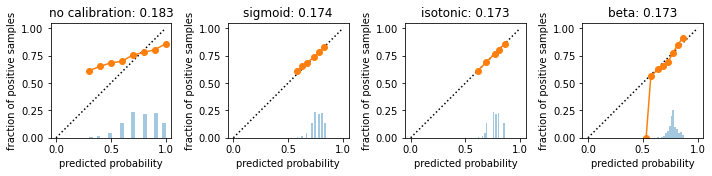

In [166]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_knn[:, 1], scores_knn_sigm[:, 1], scores_knn_iso[:, 1], scores_knn_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

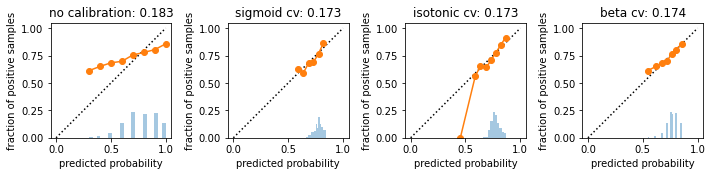

In [167]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid cv', 'isotonic cv', 'beta cv'],
                       [scores_knn[:, 1], scores_knn_sigm_cv[:, 1], scores_knn_iso_cv[:, 1], scores_knn_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

In [168]:
pECE(y_test.values, scores_knn_sigm[:,1])

0.7795

In [169]:
pECE(y_test.values, scores_knn_sigm_cv[:,1])

0.0

In [170]:
pECE(y_test.values, scores_knn_iso[:,1])

1.0

In [171]:
pECE(y_test.values, scores_knn_iso_cv[:,1])

0.0

In [172]:
pECE(y_test.values, scores_knn_beta[:,1])

0.0

In [173]:
pECE(y_test.values, scores_knn_beta_cv[:,1])

0.1492

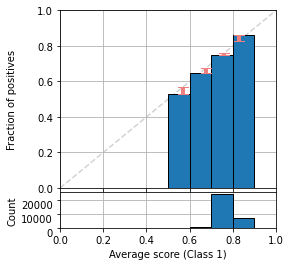

In [174]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

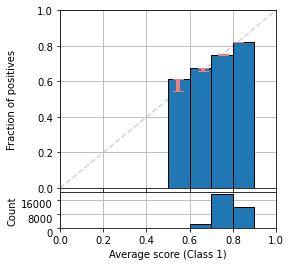

In [175]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

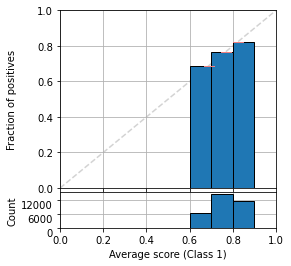

In [176]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

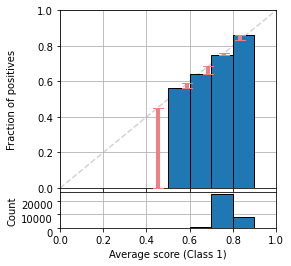

In [177]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

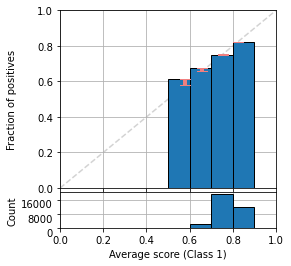

In [178]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

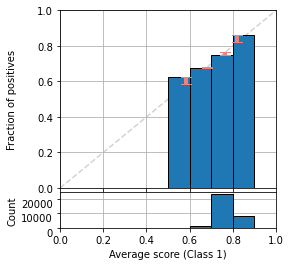

In [179]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

## 2. LR

In [180]:
# sigmoid
cal_lr_sigm = CalibratedClassifierCV(lregclassifier, cv="prefit", method='sigmoid')
cal_lr_sigm.fit(X_test, y_test)
scores_lr_sigm = cal_lr_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_lr_sigm_cv = CalibratedClassifierCV(lregclassifier, method='sigmoid')
cal_lr_sigm_cv.fit(X_train, y_train)
scores_lr_sigm_cv = cal_lr_sigm_cv.predict_proba(X_test)

# isotonic
cal_lr_iso = CalibratedClassifierCV(lregclassifier, cv="prefit", method='isotonic')
cal_lr_iso.fit(X_test, y_test)
scores_lr_iso = cal_lr_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_lr_iso_cv = CalibratedClassifierCV(lregclassifier, method='isotonic')
cal_lr_iso_cv.fit(X_train, y_train)
scores_lr_iso_cv = cal_lr_iso_cv.predict_proba(X_test)

# beta
cal_lr_beta = CalibratedClassifierCV(lregclassifier, method='beta')
cal_lr_beta.fit(X_train, y_train)
scores_lr_beta = cal_lr_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_lr_beta_cv = CalibratedClassifierCV(lregclassifier, cv="prefit", method='beta')
cal_lr_beta_cv.fit(X_test, y_test)
scores_lr_beta_cv = cal_lr_beta_cv.predict_proba(X_test)

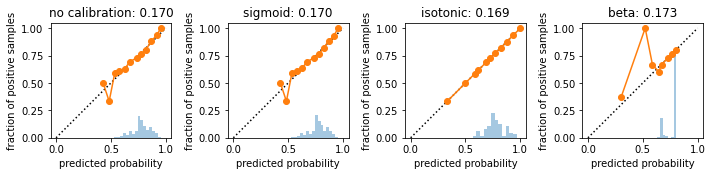

In [181]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_lreg[:, 1], scores_lr_sigm[:, 1], scores_lr_iso[:, 1], scores_lr_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

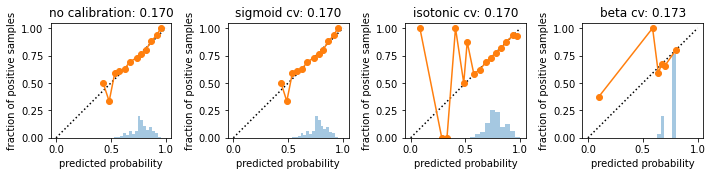

In [182]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration','sigmoid cv', 'isotonic cv','beta cv'],
                       [scores_lreg[:, 1], scores_lr_sigm_cv[:, 1], scores_lr_iso_cv[:, 1], scores_lr_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

In [183]:
pECE(y_test.values, scores_lr_sigm[:,1])

0.0

In [184]:
pECE(y_test.values, scores_lr_sigm_cv[:,1])

0.0

In [185]:
pECE(y_test.values, scores_lr_iso[:,1])

1.0

In [186]:
pECE(y_test.values, scores_lr_iso_cv[:,1])

0.7309

In [187]:
pECE(y_test.values, scores_lr_beta[:,1])

0.0043999999999999595

In [188]:
pECE(y_test.values, scores_lr_beta_cv[:,1])

0.009599999999999942

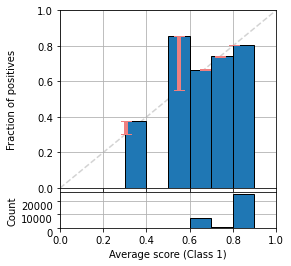

In [189]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

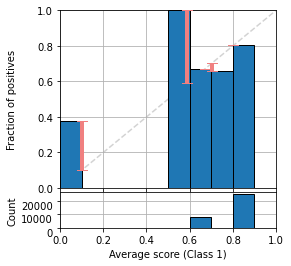

In [190]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

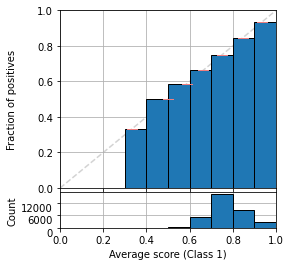

In [191]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

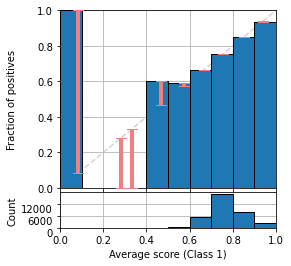

In [192]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

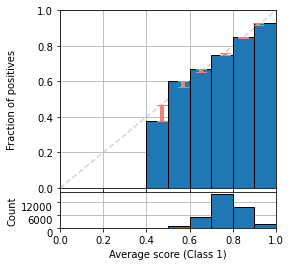

In [193]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

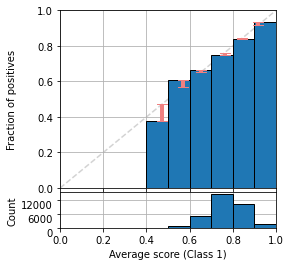

In [194]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

## 3. SVC

In [195]:
# sigmoid
cal_svc_sigm = CalibratedClassifierCV(svc, cv="prefit", method='sigmoid')
cal_svc_sigm.fit(X_test, y_test)
scores_svc_sigm = cal_svc_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_svc_sigm_cv = CalibratedClassifierCV(svc, method='sigmoid')
cal_svc_sigm_cv.fit(X_train, y_train)
scores_svc_sigm_cv = cal_svc_sigm_cv.predict_proba(X_test)

# isotonic
cal_svc_iso = CalibratedClassifierCV(svc, cv="prefit", method='isotonic')
cal_svc_iso.fit(X_test, y_test)
scores_svc_iso = cal_svc_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_svc_iso_cv = CalibratedClassifierCV(svc, method='isotonic')
cal_svc_iso_cv.fit(X_train, y_train)
scores_svc_iso_cv = cal_svc_iso_cv.predict_proba(X_test)

# beta
cal_svc_beta = CalibratedClassifierCV(svc, method='beta')
cal_svc_beta.fit(X_train, y_train)
scores_svc_beta = cal_svc_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_svc_beta_cv = CalibratedClassifierCV(svc, cv="prefit", method='beta')
cal_svc_beta_cv.fit(X_test, y_test)
scores_svc_beta_cv = cal_svc_beta_cv.predict_proba(X_test)

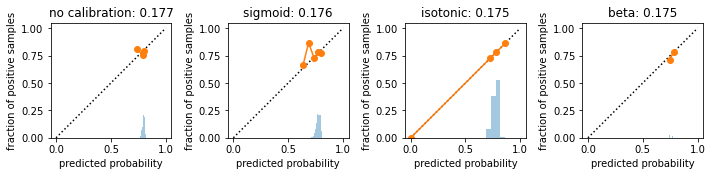

In [196]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_svc[:, 1], scores_svc_sigm[:, 1], scores_svc_iso[:, 1], scores_svc_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

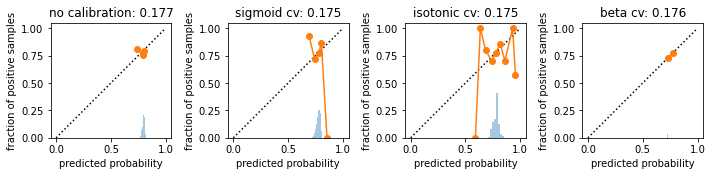

In [197]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid cv', 'isotonic cv', 'beta cv'],
                       [scores_svc[:, 1], scores_svc_sigm_cv[:, 1], scores_svc_iso_cv[:, 1], scores_svc_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

In [198]:
pECE(y_test.values, scores_svc_sigm[:,1])

0.8606

In [199]:
pECE(y_test.values, scores_svc_sigm_cv[:,1])

0.04200000000000004

In [200]:
pECE(y_test.values, scores_svc_iso[:,1])

1.0

In [201]:
pECE(y_test.values, scores_svc_iso_cv[:,1])

0.0

In [202]:
pECE(y_test.values, scores_svc_beta[:,1])

0.21015000000000006

In [203]:
pECE(y_test.values, scores_svc_beta_cv[:,1])

0.995

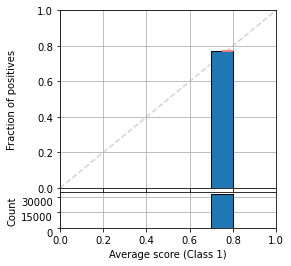

In [204]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_svc_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

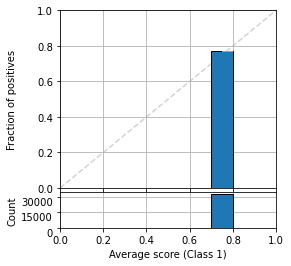

In [205]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_svc_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

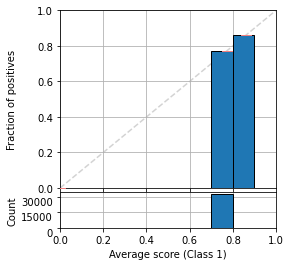

In [206]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_svc_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

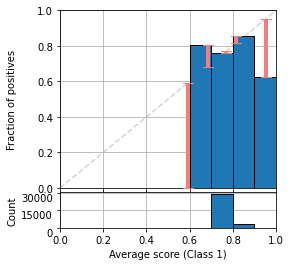

In [207]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_svc_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

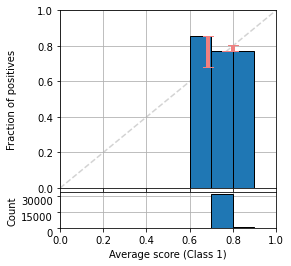

In [208]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_svc_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

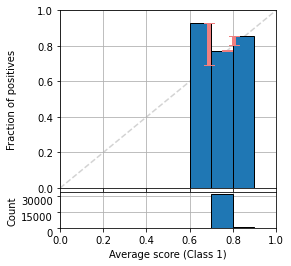

In [209]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_svc_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

## 4. XGB

In [210]:
# sigmoid
cal_xgb_sigm = CalibratedClassifierCV(XGBclf, cv="prefit", method='sigmoid')
cal_xgb_sigm.fit(X_test, y_test)
scores_xgb_sigm = cal_xgb_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_xgb_sigm_cv = CalibratedClassifierCV(XGBclf, method='sigmoid')
cal_xgb_sigm_cv.fit(X_train, y_train)
scores_xgb_sigm_cv = cal_xgb_sigm_cv.predict_proba(X_test)

# isotonic
cal_xgb_iso = CalibratedClassifierCV(XGBclf, cv="prefit", method='isotonic')
cal_xgb_iso.fit(X_test, y_test)
scores_xgb_iso = cal_xgb_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_xgb_iso_cv = CalibratedClassifierCV(XGBclf, method='isotonic')
cal_xgb_iso_cv.fit(X_train, y_train)
scores_xgb_iso_cv = cal_xgb_iso_cv.predict_proba(X_test)

# beta
cal_xgb_beta = CalibratedClassifierCV(XGBclf, method='beta')
cal_xgb_beta.fit(X_train, y_train)
scores_xgb_beta = cal_xgb_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_xgb_beta_cv = CalibratedClassifierCV(XGBclf, cv="prefit", method='beta')
cal_xgb_beta_cv.fit(X_test, y_test)
scores_xgb_beta_cv = cal_xgb_beta_cv.predict_proba(X_test)

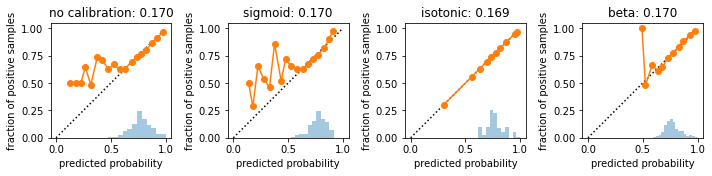

In [211]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_xgb[:, 1], scores_xgb_sigm[:, 1], scores_xgb_iso[:, 1], scores_xgb_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

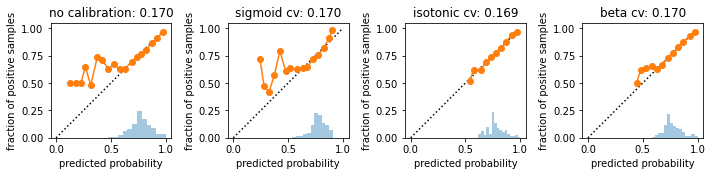

In [212]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid cv', 'isotonic cv', 'beta cv'],
                       [scores_xgb[:, 1], scores_xgb_sigm_cv[:, 1], scores_xgb_iso_cv[:, 1], scores_xgb_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

In [213]:
pECE(y_test.values, scores_xgb_sigm[:,1])

0.0

In [214]:
pECE(y_test.values, scores_xgb_sigm_cv[:,1])

0.0

In [215]:
pECE(y_test.values, scores_xgb_iso[:,1])

1.0

In [216]:
pECE(y_test.values, scores_xgb_iso_cv[:,1])

0.12939999999999996

In [217]:
pECE(y_test.values, scores_xgb_beta[:,1])

0.06319999999999992

In [218]:
pECE(y_test.values, scores_xgb_beta_cv[:,1])

0.7605

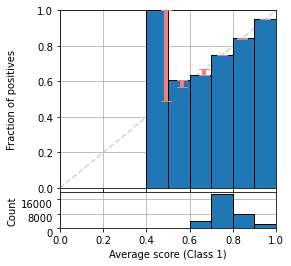

In [219]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_xgb_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

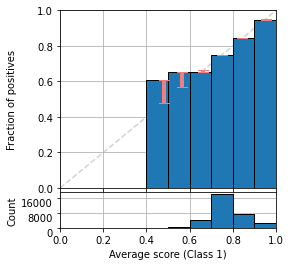

In [220]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_xgb_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

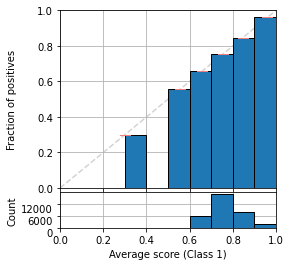

In [221]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_xgb_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

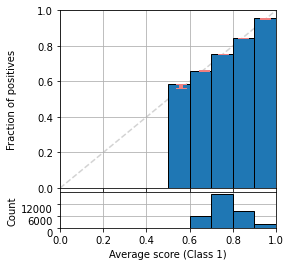

In [222]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_xgb_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

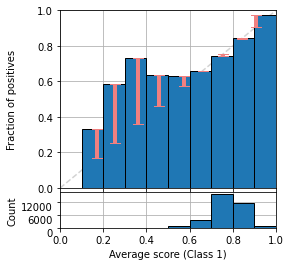

In [223]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_xgb_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

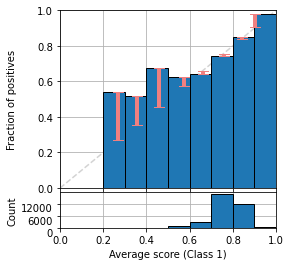

In [224]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_xgb_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)